# Framingham Heart Disease 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Set

In [2]:
DF = pd.read_csv("framingham_heart_disease.csv")
DF

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3,0,0,0,0,1,0,187,141.0,81.0,24.96,80,81,0
3652,1,68,1,0,0,0,0,1,0,176,168.0,97.0,23.14,60,79,1
3653,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
3654,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0


### Features

In [3]:
x = DF[DF.columns[0:-1]].to_numpy()

Feature Scaling

In [4]:
# i = columns
# j = rows
for i in range(len(x[1,:])):
    mean = 0
    std = 0
    mean = np.mean(x[:,i])
    std = np.std(x[:,i])
    for j in range(len(x)):
        x[j,i] = (x[j,i] - mean)/std
        if np.isnan(x[j,i]):
            x[j,i] = 0

#### Training sets and Test sets

Training set = 80%      
Test set = 20%

In [5]:
rows = len(x)
columns = len(x[1,:])

Train = round((rows*80)/100)
Test = rows-Train

xTrain = x[:Train, :]
xTest = x[Train:, :]

### Label

In [6]:
y = DF[DF.columns[-1]].to_numpy()

yTrain = y[:Train]
yTest = y[Train:]

#### Initializing Necessary Atributes

In [7]:
m = len(xTrain)
h = np.zeros(m)
theta = np.zeros(columns)

    m -> Length of Training set
    h -> Initializing hypothesis function
    thets -> Theta value 

## Gradient Descent

In [8]:
def grad(theta, features, label, alpha):
    m = len(label)
    h = Hypothesis(theta, features)
    for i in range(len(label)):
        for j in range(len(theta)):
            theta[j] = theta[j] - (alpha*((h[i]-label[i])*features[i, j]))/m
    return theta

## Sigmoid Function

In [9]:
def Hypothesis(theta, features):
    h = 1/(1+math.e**(-np.matmul(features, theta)))
    return h

## Cost Function

In [10]:
def Cost(theta, features, label):
    m = len(label)
    h = Hypothesis(theta, features)
    J = sum(((h-label)**2)/(2*m))
    return J

## main

In [11]:
cost = []

for _ in range(1000):
    alpha = 0.01
    J = Cost(theta, xTrain, yTrain)
    G = grad(theta, xTrain, yTrain, alpha)
    h = Hypothesis(theta, xTrain)
    cost.append(J)

In [12]:
print("Theta: ",theta)

Theta:  [ 0.10008484  0.21205009 -0.03334903  0.03437667  0.1001968   0.02656537
  0.07266835  0.09449289  0.07852705  0.01223391  0.15541423  0.01172178
  0.01938829  0.0088141   0.16035511]


In [13]:
print("Hypothesis: ", h)

Hypothesis:  [0.34405498 0.38608319 0.50724198 ... 0.50452365 0.63284111 0.45235232]


In [14]:
print("Cost: ", J)

Cost:  0.11750489597779548


## MSE

In [15]:
mse = 0
for i in range(m):
    mse += ((h[i]-yTrain[i])**2)
mse = mse/m
print("Mean Square Error: ", mse)

Mean Square Error:  0.23500894317412607


##### Accuracy

In [16]:
tests = np.matmul(xTest, theta)
yp = []

for test in tests:
    if test >= 0:
        yp.append(1)
    else:
        yp.append(0)
    
cp = 0
for index in range(len(yp)):
    if yp[index] == yTest[index]:
        cp += 1
        

accuracy = (cp/len(yTest))*100
print(accuracy)

61.55950752393981


# Plot

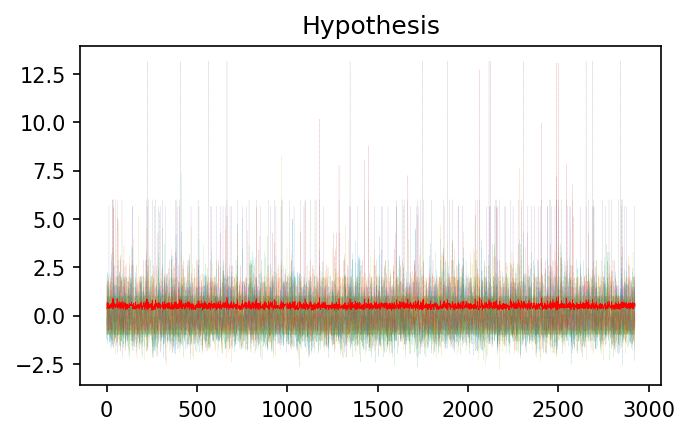

In [17]:
plt.figure(figsize=(5,3), dpi=150)
plt.title("Hypothesis")

for i in range(1, len(theta)):
    plt.plot(xTrain[:,i], linestyle=':', lw=0.1)
    
plt.plot(h, linestyle='-', lw=0.3, color='r')
    
plt.show()

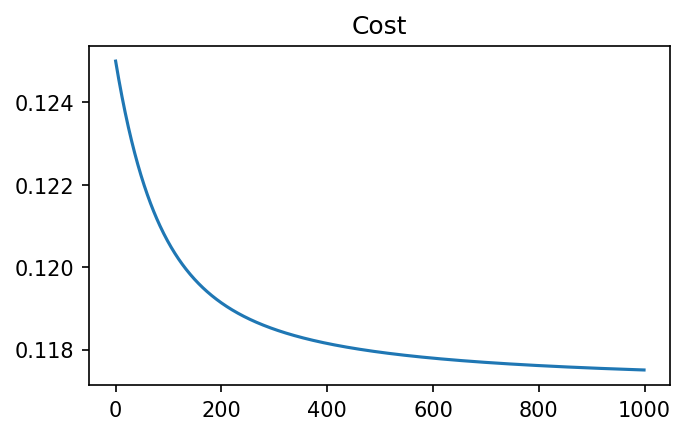

In [18]:
plt.figure(figsize=(5,3), dpi=150)
plt.title("Cost")
plt.plot(cost)
plt.show()